In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [35]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [36]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [37]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************

    err = y - tx @ w
    mse = np.mean(err**2)

    return mse

# 2. Grid Search

Fill in the function `grid_search()` below:

In [38]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************

    for idx0, w0 in enumerate(grid_w0):
        for idx1, w1 in enumerate(grid_w1):
            losses[idx0, idx1] = compute_loss(y, tx, np.array([w0, w1]))

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.015 seconds


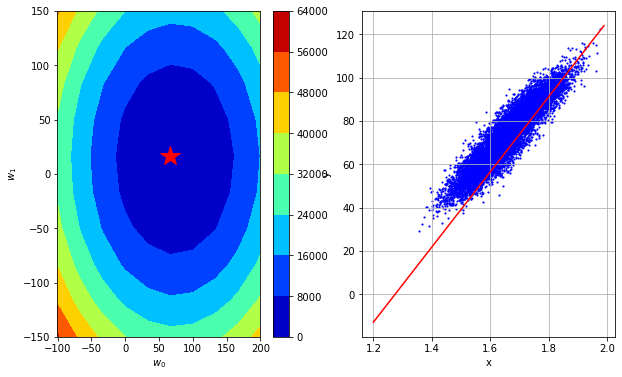

In [41]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

Grid Search: loss*=37.58708203904647, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.110 seconds


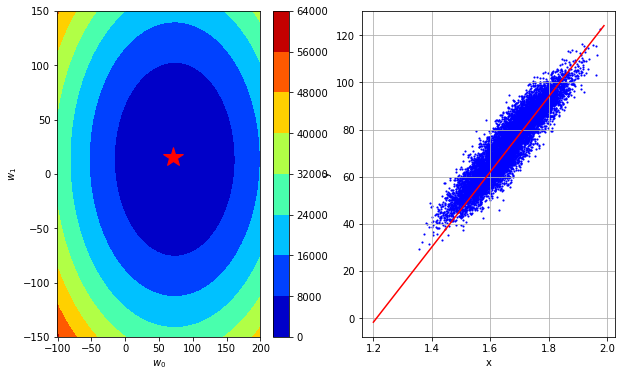

In [43]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

Grid Search: loss*=31.11740673721906, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.653 seconds


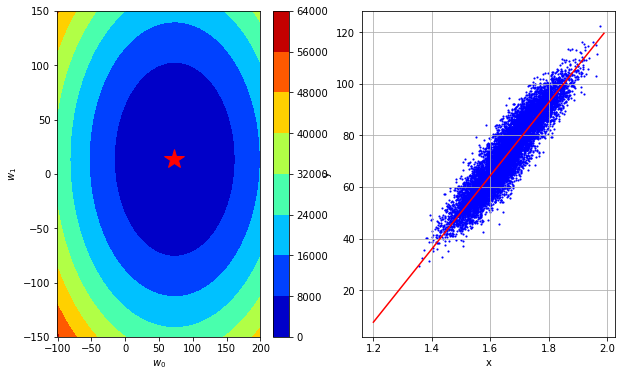

In [42]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [50]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************

    e = y - tx @ w
    grad = -tx.T @ e / tx.shape[0]

    return grad

Please fill in the functions `gradient_descent` below:

In [46]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        # ***************************************************

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma * grad
        # ***************************************************

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [69]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=756.0947763975176, w0=97.32939220021052, w1=10.347971243498908
GD iter. 1/49: loss=618.2834062721446, w0=94.92584518039999, w1=10.661145362647924
GD iter. 2/49: loss=506.65619647059236, w0=92.7626528625705, w1=10.94300206988204
GD iter. 3/49: loss=416.2381565313348, w0=90.81577977652397, w1=11.196673106392742
GD iter. 4/49: loss=342.9995441805362, w0=89.06359399908209, w1=11.424977039252374
GD iter. 5/49: loss=283.6762681763894, w0=87.4866267993844, w1=11.630450578826043
GD iter. 6/49: loss=235.62441461303052, w0=86.06735631965648, w1=11.815376764442345
GD iter. 7/49: loss=196.7024132267101, w0=84.79001288790136, w1=11.981810331497018
GD iter. 8/49: loss=165.17559210379036, w0=83.64040379932173, w1=12.131600541846222
GD iter. 9/49: loss=139.63886699422522, w0=82.60575561960007, w1=12.266411731160506
GD iter. 10/49: loss=118.95411965547754, w0=81.67457225785058, w1=12.387741801543362
GD iter. 11/49: loss=102.19947431109196, w0=80.83650723227605, w1=12.49693886488793


In [70]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [72]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        for batch_y, batch_tx in batch_iter(y, tx, batch_size=batch_size):
            # Compute the loss and gradient on the current mini-batch
            loss = compute_loss(batch_y, batch_tx, w)
            grad = compute_gradient(batch_y, batch_tx, w)

            # Update the weight vector
            w = w - gamma * grad

            # Store the loss and updated weight vector
            losses.append(loss)
            ws.append(w)

        # ***************************************************

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [73]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=4290.520214710236, w0=6.5502062675233645, w1=1.75098622086981
SGD iter. 1/49: loss=3240.843221041033, w0=12.243046701824184, w1=-2.532747307804299
SGD iter. 2/49: loss=4005.823055746166, w0=18.572203877741185, w1=-4.0667805575660285
SGD iter. 3/49: loss=761.6573071160601, w0=21.332017833637597, w1=-7.008540205289448
SGD iter. 4/49: loss=432.68747849806635, w0=23.412131961511513, w1=-9.992579298381267
SGD iter. 5/49: loss=6517.631118837922, w0=31.485316660772348, w1=-0.6710013137276718
SGD iter. 6/49: loss=3301.4171639260608, w0=37.23111265778274, w1=4.407148946629931
SGD iter. 7/49: loss=843.0495202754284, w0=40.134644163166186, w1=1.457255254787719
SGD iter. 8/49: loss=1625.7775582744541, w0=44.166737364314265, w1=3.3467710319431045
SGD iter. 9/49: loss=1585.3459388321642, w0=48.148377652979434, w1=9.637760548092427
SGD iter. 10/49: loss=566.1568665363912, w0=50.52778276043043, w1=5.749808710428411
SGD iter. 11/49: loss=1413.8982629908282, w0=54.2879666162955, w1=

In [77]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [83]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [84]:
y.shape, tx.shape

((202,), (202, 2))

In [91]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
# ***************************************************

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/499: loss=5739.670229071705, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/499: loss=636.56424940319, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/499: loss=177.2847112330252, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/499: loss=135.94955279771042, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/499: loss=132.22938853853208, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/499: loss=131.89457375520604, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/499: loss=131.8644404247067, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/499: loss=131.86172842496174, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/499: loss=131.86148434498472, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/499: loss=131.86146237778675, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/499: loss=131.86146040073896, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/499: loss=131.86146022280465, w0=74.06776649225756, w1=11.0348

In [92]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function

In [ ]:
def compute_loss(y, tx, w):
    return np.mean(np.abs(y - tx @ w))

The Mean Absolute Error (MAE) is defined as:
$$
\mathrm{MAE}(w)=\frac{1}{N} \sum_{i=1}^N\left|y_i-\mathbf{t} \mathbf{x}_i \cdot w\right|
$$
The gradient (or subgradient in this case, since the absolute value function is not differentiable everywhere) for MAE with respect to $w$ can be computed as:
$$
\nabla_w \mathrm{MAE}=\frac{1}{N} \sum_{i=1}^N \operatorname{sign}\left(y_i-\mathbf{t x}_{\mathrm{i}} \cdot w\right) \times\left(-\mathbf{t x}_{\mathrm{i}}\right)
$$
Where:
- $\operatorname{sign}(z)$ is 1 if $z>0,-1$ if $z<0$, and can be any value in $[-1,1]$ if $z=0$ (this is why it's a subgradient):

In [87]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    residuals = y - tx @ w

    subgrad = -np.mean(np.sign(residuals)[:, np.newaxis] * tx, axis=0)
    # ***************************************************
    return subgrad

There would be broadcast when performing `np.sign(residuals)[:, np.newaxis] * tx`, due to:
* The shape of `np.sign(residuals)` is `(N,)`
* The shape of `tx` is `(N,2)`

By adding an extra dimension via `[:, np.newaxis]`, the first element of the row in `tx` is multiplied with the (single) value of the reshaped residuals, the second element of the row in `tx` is also multiplied with the same value of the reshaped residuals.

In [88]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        loss    = compute_loss(y, tx, w)
        subgrad = compute_subgradient_mae(y, tx, w) 
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        w = w - gamma * subgrad
        # ***************************************************

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [97]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.5
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=5739.670229071705, w0=0.5, w1=4.3639459482790806e-16
SubGD iter. 1/499: loss=5665.85242321678, w0=1.0, w1=8.727891896558161e-16
SubGD iter. 2/499: loss=5592.534617361853, w0=1.5, w1=1.3091837844837243e-15
SubGD iter. 3/499: loss=5519.716811506927, w0=2.0, w1=1.7455783793116322e-15
SubGD iter. 4/499: loss=5447.399005652, w0=2.5, w1=2.18197297413954e-15
SubGD iter. 5/499: loss=5375.581199797074, w0=3.0, w1=2.618367568967448e-15
SubGD iter. 6/499: loss=5304.263393942148, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 7/499: loss=5233.44558808722, w0=4.0, w1=3.491156758623264e-15
SubGD iter. 8/499: loss=5163.127782232295, w0=4.5, w1=3.927551353451172e-15
SubGD iter. 9/499: loss=5093.309976377368, w0=5.0, w1=4.36394594827908e-15
SubGD iter. 10/499: loss=5023.9921705224415, w0=5.5, w1=4.800340543106989e-15
SubGD iter. 11/499: loss=4955.174364667516, w0=6.0, w1=5.236735137934897e-15
SubGD iter. 12/499: loss=4886.856558812588, w0=6.5, w1=5.6731297327628055e-15
SubGD iter.

In [98]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [99]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        for batch_y, batch_tx in batch_iter(y, tx, batch_size=batch_size):
            # Compute the loss and gradient on the current mini-batch
            loss = compute_loss(batch_y, batch_tx, w)
            subgrad = compute_subgradient_mae(batch_y, batch_tx, w)

            # Update the weight vector
            w = w - gamma * subgrad

            # Store the loss and updated weight vector
            losses.append(loss)
            ws.append(w)
        # ***************************************************

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [100]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=3440.7003946675973, w0=0.7, w1=-0.2799289924364632
SubSGD iter. 1/499: loss=7327.948095747472, w0=1.4, w1=-0.06876459787025938
SubSGD iter. 2/499: loss=2933.4302596136145, w0=2.0999999999999996, w1=-0.6815627688716717
SubSGD iter. 3/499: loss=3653.4869814390245, w0=2.8, w1=-0.6252531538263681
SubSGD iter. 4/499: loss=7698.257292038932, w0=3.5, w1=0.00702127465532254
SubSGD iter. 5/499: loss=4944.809517537826, w0=4.2, w1=0.05918162018503317
SubSGD iter. 6/499: loss=3681.246972187633, w0=4.9, w1=-0.4949254538115476
SubSGD iter. 7/499: loss=4497.234365425236, w0=5.6000000000000005, w1=-0.6219398990395728
SubSGD iter. 8/499: loss=3046.8705239109695, w0=6.300000000000001, w1=-1.047726046330312
SubSGD iter. 9/499: loss=6322.67619937252, w0=7.000000000000001, w1=-0.7822423441060817
SubSGD iter. 10/499: loss=7240.826307056604, w0=7.700000000000001, w1=-0.13931264534228616
SubSGD iter. 11/499: loss=4674.313486147243, w0=8.4, w1=0.4090818584155247
SubSGD iter. 12/499: lo

In [101]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>